# Converting pressures into depths
- This notebook shows how to use the density profiles built into Thermobar to convert density to depth. 
- In this example, we are using Cpx-only barometry just as an example. You can download the example data here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Other_features/Example_Liq_Px_Amp.xlsx
- If you haven't imported Thermobar, do so below by removing the #

In [1]:
#!pip install Thermobar

In [2]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
out2=pt.import_excel('Example_Liq_Px_Amp.xlsx', sheet_name="Pyroxene")
Cpxs1=out2['Cpxs']
Cpxs1.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,45.19,3.31,8.88,7.98,0.0764,11.88,20.94,0.6452,0.0000,0.2344,Lava_1_text_cpx1
1,48.50,2.51,6.47,7.11,0.1244,13.07,21.35,0.6048,0.0007,0.1034,Lava_1_text_cpx_1
2,48.18,2.62,6.70,7.63,0.1498,12.77,21.41,0.7057,0.0027,0.2723,Lava_1_text_cpx_1
3,49.73,2.03,5.86,7.03,0.0519,13.67,21.00,0.4540,0.0083,0.1600,Lava_1_text_cpx_2
4,46.01,3.22,8.73,8.08,0.1089,11.95,20.82,0.6429,0.0037,0.0000,Lava_1_text_cpx_2


In [4]:
Calc_P=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs1, 
                                               equationT="T_Put2008_eq32d",
                                               equationP="P_Put2008_eq32b")  
Calc_P.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:3025: UserWarning: This Cpx-only barometer is sensitive to H2O content of the liquid.  By default, this function uses H2O=0 wt%, else you can enter a value of H2O_Liq in the function
  w.warn('This Cpx-only barometer is sensitive to H2O content of the liquid. '


,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,1.899763,1355.756009,2.273737e-13,1.591616e-12,45.19,3.31,8.88,7.98,0.0764,11.88,20.94,0.6452,0.0000,0.2344,Lava_1_text_cpx1
1,3.880512,1396.492499,0.000000e+00,0.000000e+00,48.50,2.51,6.47,7.11,0.1244,13.07,21.35,0.6048,0.0007,0.1034,Lava_1_text_cpx_1
2,3.661785,1385.544329,0.000000e+00,0.000000e+00,48.18,2.62,6.70,7.63,0.1498,12.77,21.41,0.7057,0.0027,0.2723,Lava_1_text_cpx_1
3,4.496111,1422.672182,0.000000e+00,0.000000e+00,49.73,2.03,5.86,7.03,0.0519,13.67,21.00,0.4540,0.0083,0.1600,Lava_1_text_cpx_2
4,2.921272,1369.518603,0.000000e+00,0.000000e+00,46.01,3.22,8.73,8.08,0.1089,11.95,20.82,0.6429,0.0037,0.0000,Lava_1_text_cpx_2


## Now convert pressure to depth using a variety of crustal density models

In [5]:
help(pt.convert_pressure_to_depth)

Help on function convert_pressure_to_depth in module Thermobar.density_profiles:

convert_pressure_to_depth(P_kbar=None, crust_dens_kgm3=None, g=9.81, d1=None, d2=None, rho1=None, rho2=None, rho3=None, model=None)
    Converts pressure in kbar to depth in km using a variety of crustal density profiles
    
    
    Parameters
    -----------
    
    P_kbar: int, float, pd.Series, np.ndarray
        Pressure in kbar
    
    g: float
        gravitational constant, in m/s2
    
    crust_dens_kgm3: float or str
        If float: Crustal density in kg/m3
    
        If model, choose from:
    
        ryan_lerner:
            Parameterization of Ryan 1987, actual equation from Lerner et al. 2021
            After 16.88 km (455 MPa), assume density is 2.746, as density turns around again. This profile is tweaked for Hawaii
    
        mavko_debari:
            Parameterization of Mavko and Thompson (1983) and DeBari and Greene (2011)
            as given in Putirka (2017) Down the Crat

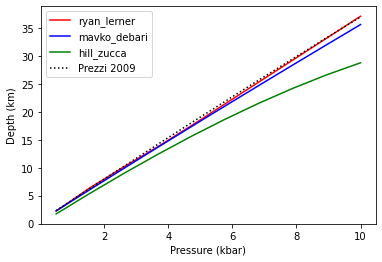

In [6]:
# Lets first examine these density models using a linear array between 0.5 and 10 kbar
P_array=np.linspace(0.5, 10, 10)

# Using the density model from Lerner et al. (2021) based on Ryan
ryan_lerner=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="ryan_lerner")

# Using the  Parameterization of Mavko and Thompson (1983) and DeBari and Greene (2011)
# as given in Putirka (2017) Down the Crater Elements supplement.
mavko_debari=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="mavko_debari")

#             Parameterization of Prezzi et al. (2009),
# as given in Putirka (2017) Down the Crater Elements supplement. Tweaked for Andes.
prezzi=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="prezzi")

#            Parameterization of Hill and Zucca (1987),
# as given in Putirka (2017) Down the Crater Elements supplement
hill_zucca=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="hill_zucca")


plt.plot(P_array, ryan_lerner, '-r', label='ryan_lerner')
plt.plot(P_array, mavko_debari, '-b', label='mavko_debari')
plt.plot(P_array, hill_zucca, '-g', label='hill_zucca')
plt.plot(P_array, prezzi, ':k', label='Prezzi 2009')
plt.xlabel('Pressure (kbar)')
plt.ylabel('Depth (km)')
plt.legend()

## Density models for given densities in kg/m3

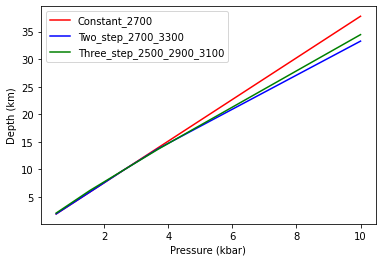

In [7]:
# Single density of 2700 kg/m3 all the way through
Constant_2700=pt.convert_pressure_to_depth(P_kbar=P_array, crust_dens_kgm3=2700, g=9.81)
                                           
# Two step density profile, d1 is first step (e.g. Moho here)
Two_step_2700_3300=pt.convert_pressure_to_depth(P_kbar=P_array, 
                    model='two-step', d1=13, rho1=2700, rho2=3300, g=9.81)                                    
                                           
Three_step_2500_2900_3100=pt.convert_pressure_to_depth(P_kbar=P_array, 
                    model='three-step', d1=5, d2=14, rho1=2500, rho2=2900, rho3=3100,g=9.81)                                    
plt.plot(P_array, Constant_2700, '-r', label='Constant_2700')
plt.plot(P_array, Two_step_2700_3300, '-b', label='Two_step_2700_3300')
plt.plot(P_array, Three_step_2500_2900_3100, '-g', label='Three_step_2500_2900_3100')
plt.xlabel('Pressure (kbar)')
plt.ylabel('Depth (km)')
plt.legend()                                          

## Now lets choose one for our samples

In [12]:
Depth_ryan_lerner=pt.convert_pressure_to_depth(P_kbar=Calc_P['P_kbar_calc'], model='ryan_lerner')
Depth_ryan_lerner

0       7.653447
1      14.476528
2      13.716467
3      16.685551
4      11.188643
         ...    
569    28.202109
570    21.592532
571    14.001327
572    24.112308
573    24.250966
Length: 574, dtype: float64

## Now we can draw a histogram of depths in km

Text(0.5, 0, 'Calc Depth (km)')

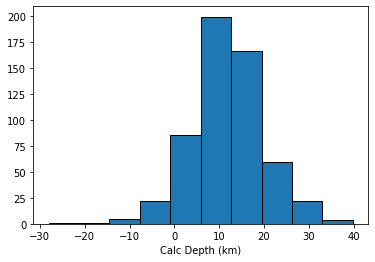

In [17]:
plt.hist(Depth_ryan_lerner, ec='k');
plt.xlabel('Calc Depth (km)')

## Or we can use a constant density

In [13]:
Depth_constrho=pt.convert_pressure_to_depth(P_kbar=Calc_P['P_kbar_calc'], crust_dens_kgm3=2700)
Depth_constrho

0       7.179753
1      14.665578
2      13.838945
3      16.992104
4      11.040332
         ...    
569    28.720642
570    21.989539
571    14.149996
572    24.555644
573    24.696852
Name: P_kbar_calc, Length: 574, dtype: float64